In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn as sk
import matplotlib as mpl
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set()
sns.set_color_codes()

%matplotlib inline
%config InlineBackend.figure_format='png'


In [2]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
    'The last document?',    
]
vect = CountVectorizer()
vect.fit(corpus)
vect.vocabulary_

{'and': 0,
 'document': 1,
 'first': 2,
 'is': 3,
 'last': 4,
 'one': 5,
 'second': 6,
 'the': 7,
 'third': 8,
 'this': 9}

In [3]:
vect = CountVectorizer(max_df=4, min_df=2).fit(corpus)


In [4]:
vect.vocabulary_, vect.stop_words_

({'document': 0, 'first': 1, 'is': 2, 'this': 3},
 {'and', 'last', 'one', 'second', 'the', 'third'})

In [5]:
vect = CountVectorizer().fit(corpus)

In [8]:
vect.vocabulary_

{'and': 0,
 'document': 1,
 'first': 2,
 'is': 3,
 'last': 4,
 'one': 5,
 'second': 6,
 'the': 7,
 'third': 8,
 'this': 9}

In [7]:
vect.transform(corpus).toarray().sum(axis=0)

array([1, 4, 2, 3, 1, 1, 2, 5, 1, 3])

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
tfidv = TfidfVectorizer().fit(corpus)
tfidv.transform(corpus).toarray()

array([[ 0.        ,  0.38947624,  0.55775063,  0.4629834 ,  0.        ,
         0.        ,  0.        ,  0.32941651,  0.        ,  0.4629834 ],
       [ 0.        ,  0.24151532,  0.        ,  0.28709733,  0.        ,
         0.        ,  0.85737594,  0.20427211,  0.        ,  0.28709733],
       [ 0.55666851,  0.        ,  0.        ,  0.        ,  0.        ,
         0.55666851,  0.        ,  0.26525553,  0.55666851,  0.        ],
       [ 0.        ,  0.38947624,  0.55775063,  0.4629834 ,  0.        ,
         0.        ,  0.        ,  0.32941651,  0.        ,  0.4629834 ],
       [ 0.        ,  0.45333103,  0.        ,  0.        ,  0.80465933,
         0.        ,  0.        ,  0.38342448,  0.        ,  0.        ]])

In [193]:
X00 = sp.stats.norm(-2, 1).rvs(50)
X01 = sp.stats.norm(+2, 1).rvs(50)

X10 = sp.stats.norm(+3, 2).rvs(50)
X11 = sp.stats.norm(+7, 3).rvs(50)

X20 = sp.stats.norm(+5, 1).rvs(50)
X21 = sp.stats.norm(+3, 2).rvs(50)

X0 = np.vstack([X00,X01]).T
X1 = np.vstack([X10,X11]).T
X2 = np.vstack([X20,X21]).T

X = np.vstack([X0,X1,X2])
X.shape

y0 = np.zeros(50)
y1 = np.ones(50)
y2 = np.ones(50) * 2
y = np.hstack([y0,y1,y2])[:,np.newaxis]
y.shape

Xy = np.hstack([X,y])

In [197]:
X_df = pd.DataFrame(Xy, columns=['X0','X1','y'])

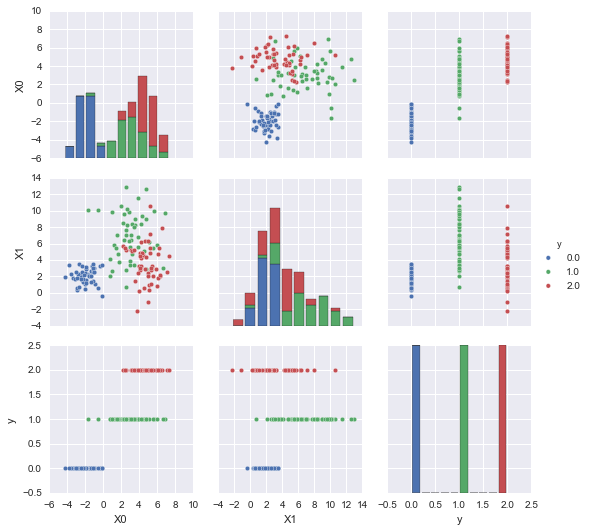

In [195]:
sns.pairplot(X_df, hue="y")

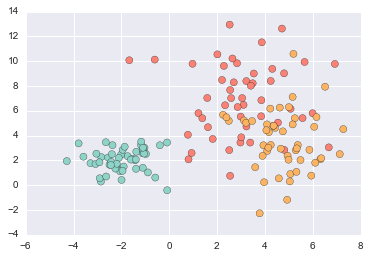

In [201]:
cmap = mpl.colors.ListedColormap(sns.color_palette("Set3"))
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap=cmap)

In [206]:
from sklearn.naive_bayes import GaussianNB
clf_norm = GaussianNB().fit(X,y)

/home/rrbb/.pyenv/versions/3.5.1/envs/python3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [207]:
clf_norm.classes_

array([ 0.,  1.,  2.])

In [208]:
clf_norm.class_count_

array([ 50.,  50.,  50.])

In [209]:
clf_norm.class_prior_

array([ 0.33333333,  0.33333333,  0.33333333])

In [210]:
clf_norm.theta_, clf_norm.sigma_

(array([[-1.94633003,  2.04934779],
        [ 3.037226  ,  6.91927404],
        [ 4.76635327,  3.59396459]]), array([[ 0.85189353,  0.8359859 ],
        [ 2.83895493,  8.17459234],
        [ 1.24649974,  5.42785848]]))

In [212]:
y_predict = clf_norm.predict(X)

In [213]:
from sklearn.metrics import confusion_matrix
clf_result = confusion_matrix(y, y_predict)

In [214]:
clf_result

array([[50,  0,  0],
       [ 0, 40, 10],
       [ 0,  8, 42]])

In [225]:
from sklearn.metrics import classification_report
print(classification_report?

In [226]:
print(classification_report(y,y_predict))

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        50
        1.0       0.83      0.80      0.82        50
        2.0       0.81      0.84      0.82        50

avg / total       0.88      0.88      0.88       150



In [228]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis(store_covariances=True).fit(X, y)

/home/rrbb/.pyenv/versions/3.5.1/envs/python3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


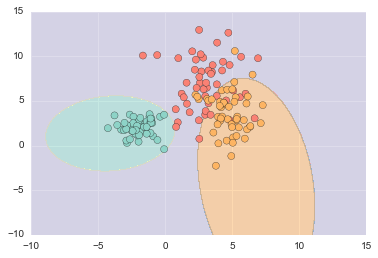

In [234]:
xmin, xmax = -10, 15
ymin, ymax = -10, 15
XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000), np.arange(ymin, ymax, (ymax-ymin)/1000))
ZZ = np.reshape(qda.predict(np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
cmap = mpl.colors.ListedColormap(sns.color_palette("Set3"))
plt.contourf(XX, YY, ZZ, cmap=cmap, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cmap)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.show()

In [41]:
X0.mean(), X0.var(), X1.mean(), X1.var()

(-1.8619161572303782,
 0.8586128820694926,
 1.8830285850671031,
 1.3066090770986736)

In [31]:
from sklearn.naive_bayes import GaussianNB
clf_norm = GaussianNB().fit(X, y)

In [32]:
clf_norm.classes_    # 분류 하려는 class

array([ 0.,  1.])

In [33]:
clf_norm.class_count_ # 0은 몇번 나옴? 1은 몇번 나옴?

array([ 40.,  60.])

In [36]:
clf_norm.class_prior_  # 사전확률 P(y=0) , P(y=1)

array([ 0.4,  0.6])

In [35]:
clf_norm.theta_, clf_norm.sigma_  # mean 과 variance

(array([[-1.86191616],
        [ 1.88302859]]), array([[ 0.85861289],
        [ 1.30660908]]))

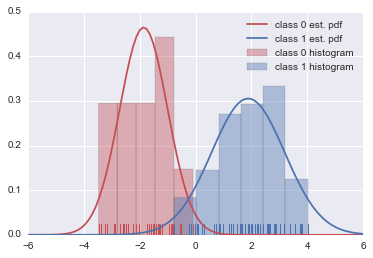

In [43]:
# kernel density가 아닌 gaussian curve
xx = np.linspace(-6, 6, 100)
p0 = sp.stats.norm(clf_norm.theta_[0], clf_norm.sigma_[0]).pdf(xx)
p1 = sp.stats.norm(clf_norm.theta_[1], clf_norm.sigma_[1]).pdf(xx)                                                               
sns.distplot(X0, rug=True, kde=False, norm_hist=True, color="r", label="class 0 histogram")
sns.distplot(X1, rug=True, kde=False, norm_hist=True, color="b", label="class 1 histogram")
plt.plot(xx, p0, c="r", label="class 0 est. pdf")
plt.plot(xx, p1, c="b", label="class 1 est. pdf")
plt.legend()
plt.show()

In [46]:
x_new = -1
clf_norm.predict_proba([[x_new]])

array([[ 0.92774474,  0.07225526]])

In [50]:
px = sp.stats.norm(clf_norm.theta_, np.sqrt(clf_norm.sigma_)).pdf(x_new)
px

array([[ 0.27933708],
       [ 0.01450368]])

In [52]:
p = px.flatten() * clf_norm.class_prior_
p

array([ 0.11173483,  0.00870221])

In [53]:
p / p.sum()

array([ 0.92774474,  0.07225526])

# 베르누이 나이브베이즈

In [236]:
np.random.seed(0)
X = np.random.randint(2, size=(10, 4))
y = np.array([0,0,0,0,1,1,1,1,1,1])
print(X)
print(y)

[[0 1 1 0]
 [1 1 1 1]
 [1 1 1 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 1 1 0]
 [0 1 1 1]
 [1 0 1 0]
 [1 0 1 1]
 [0 1 1 0]]
[0 0 0 0 1 1 1 1 1 1]


In [237]:
from sklearn.naive_bayes import BernoulliNB
clf_bern = BernoulliNB().fit(X, y)

In [238]:
clf_bern.classes_

array([0, 1])

In [239]:
clf_bern.class_count_

array([ 4.,  6.])

In [243]:
np.exp(clf_bern.class_log_prior_)

array([ 0.4,  0.6])

In [245]:
fc = clf_bern.feature_count_
fc

array([[ 2.,  4.,  3.,  1.],
       [ 2.,  3.,  5.,  3.]])

In [246]:
theta = np.exp(clf_bern.feature_log_prob_)
theta

array([[ 0.5       ,  0.83333333,  0.66666667,  0.33333333],
       [ 0.375     ,  0.5       ,  0.75      ,  0.5       ]])

In [247]:
from sklearn.naive_bayes import MultinomialNB
clf_mult = MultinomialNB().fit(X,y)

In [248]:
clf_mult.classes_

array([0, 1])

In [249]:
clf_mult.class_count_

array([ 4.,  6.])

In [250]:
fc = clf_mult.feature_count_
fc

array([[ 2.,  4.,  3.,  1.],
       [ 2.,  3.,  5.,  3.]])

In [251]:
fc / np.repeat(fc.sum(axis=1)[:,np.newaxis], 4, axis=1)

array([[ 0.2       ,  0.4       ,  0.3       ,  0.1       ],
       [ 0.15384615,  0.23076923,  0.38461538,  0.23076923]])

In [252]:
clf_mult.alpha

1.0

In [254]:
# 손으로도 구할수 있어야해요...ㅠ

(fc + clf_mult.alpha) / (np.repeat(fc.sum(axis=1)[:, np.newaxis], 4, axis=1) + clf_mult.alpha * X.shape[1])

array([[ 0.21428571,  0.35714286,  0.28571429,  0.14285714],
       [ 0.17647059,  0.23529412,  0.35294118,  0.23529412]])

In [255]:
theta = np.exp(clf_mult.feature_log_prob_)
theta

array([[ 0.21428571,  0.35714286,  0.28571429,  0.14285714],
       [ 0.17647059,  0.23529412,  0.35294118,  0.23529412]])

In [256]:
x_new = np.array([21, 35, 29, 14])
clf_mult.predict_proba([x_new])

array([[ 0.99431066,  0.00568934]])

In [257]:
p = (theta**x_new).prod(axis=1)*np.exp(clf_bern.class_log_prior_)
p / p.sum()

array([ 0.99431066,  0.00568934])

In [258]:
x_new = np.array([18, 24, 35, 24])
clf_mult.predict_proba([x_new])

array([[ 0.00189418,  0.99810582]])

In [259]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.cross_validation import train_test_split
news = fetch_20newsgroups(subset="all")
X_train, X_test, y_train, y_test = train_test_split(news.data, news.target, test_size=0.1, random_state=1)

In [262]:
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf_0 = Pipeline([
        ('vect', CountVectorizer()),
        ('clf', LogisticRegression()),
    ])
clf_1 = Pipeline([
            ('vect', CountVectorizer()), 
            ('clf', MultinomialNB()),
        ])
clf_2 = Pipeline([
            ('vect', TfidfVectorizer()),
            ('clf', MultinomialNB()),
        ])
clf_3 = Pipeline([
            ('vect', TfidfVectorizer(token_pattern=r"\b[a-z0-9_\-\.]+[a-z][a-z0-9_\-\.]+\b")),
            ('clf', MultinomialNB()),
        ])
clf_4 = Pipeline([
            ('vect', TfidfVectorizer(stop_words="english", 
                                     token_pattern=r"\b[a-z0-9_\-\.]+[a-z][a-z0-9_\-\.]+\b")),
            ('clf', MultinomialNB()),
        ])
clf_5 = Pipeline([
            ('vect', TfidfVectorizer(stop_words="english", 
                                     token_pattern=r"\b[a-z0-9_\-\.]+[a-z][a-z0-9_\-\.]+\b")),
            ('clf', MultinomialNB(alpha=0.01)),
        ])


In [263]:
from sklearn.cross_validation import cross_val_score, KFold
from scipy.stats import sem

for i, clf in enumerate([clf_0, clf_1, clf_2, clf_3, clf_4, clf_5]):
    scores = cross_val_score(clf, X_test, y_test, cv=5)
    print(("Model {0:d}: Mean score: {1: .3f} (+/-{2: .3f})").format(i, np.mean(scores), sem(scores)))
    

Model 0: Mean score:  0.718 (+/- 0.006)
Model 1: Mean score:  0.607 (+/- 0.005)
Model 2: Mean score:  0.548 (+/- 0.013)
Model 3: Mean score:  0.614 (+/- 0.008)
Model 4: Mean score:  0.741 (+/- 0.004)
Model 5: Mean score:  0.808 (+/- 0.008)


In [270]:
clf0_fit = clf_0.fit(X_train, y_train)

In [272]:
clf0_predict = clf0_fit.predict(X_test)

In [278]:
confusion_matrix(y_test, clf0_predict)
print(classification_report(y_test, clf0_predict))

             precision    recall  f1-score   support

          0       0.96      0.91      0.93        78
          1       0.84      0.86      0.85       101
          2       0.90      0.92      0.91        96
          3       0.85      0.89      0.87       110
          4       0.88      0.89      0.89       101
          5       0.95      0.86      0.90       101
          6       0.91      0.94      0.92        93
          7       0.92      0.90      0.91       109
          8       0.96      0.98      0.97       103
          9       0.97      0.94      0.95       101
         10       0.99      0.99      0.99       110
         11       0.94      0.96      0.95       104
         12       0.79      0.87      0.83        79
         13       0.93      0.96      0.95        90
         14       0.99      0.96      0.97       101
         15       0.94      0.97      0.96       110
         16       0.95      0.93      0.94        98
         17       0.99      0.99      0.99   